In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\iris.csv")

In [3]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


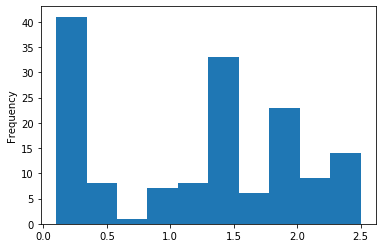

In [4]:
df['Petal width'].plot.hist()

In [5]:
plt.show()

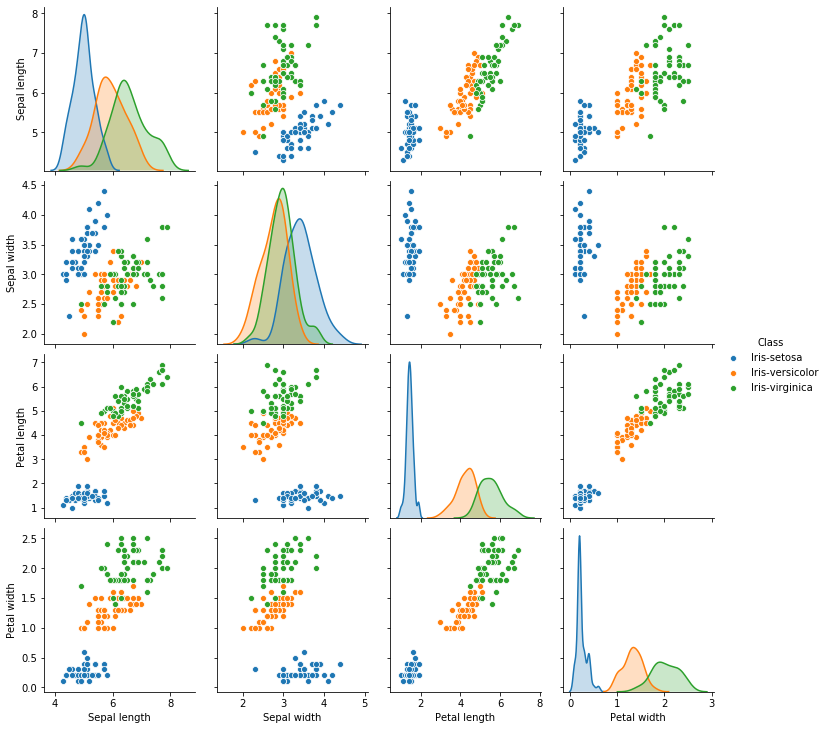

In [7]:
#pairplot that plot pairwise relationships in a dataset
sns.pairplot(df,hue='Class')

In [9]:
#split the dataset into training and testing sets
features = df[['Sepal length','Sepal width','Petal length','Petal width']].values
classes=df['Class'].values

(train_feat,test_feat,train_classes,test_classes)=train_test_split(features,classes,train_size=0.7,random_state=1)



In [10]:
#random_state is to make sure the splited dataset is the same even if we split the dataset again and again.

In [13]:
#Training
dectree=DecisionTreeClassifier()
dectree.fit(train_feat,train_classes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
#Testing
pred=dectree.predict(test_feat)
print("Accuracy:",accuracy_score(test_classes,pred))

Accuracy: 0.9555555555555556


In [19]:
print(confusion_matrix(test_classes,pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [22]:
#Predicting a single input feature
sepl=input("Sepal length:")
sepw=input("Sepal width:")
petl=input("Petal length:")
petw=input("Petal width:")
print(sepl,sepw,petl,petw)
pr=dectree.predict(np.column_stack([sepl,sepw,petl,petw]))
print("Predicted Specied is: ",pr)

Sepal length:4.6
Sepal width:3.1
Petal length:1.5
Petal width:0.2
4.6 3.1 1.5 0.2
Predicted Specied is:  ['Iris-setosa']


In [23]:
from sklearn import tree

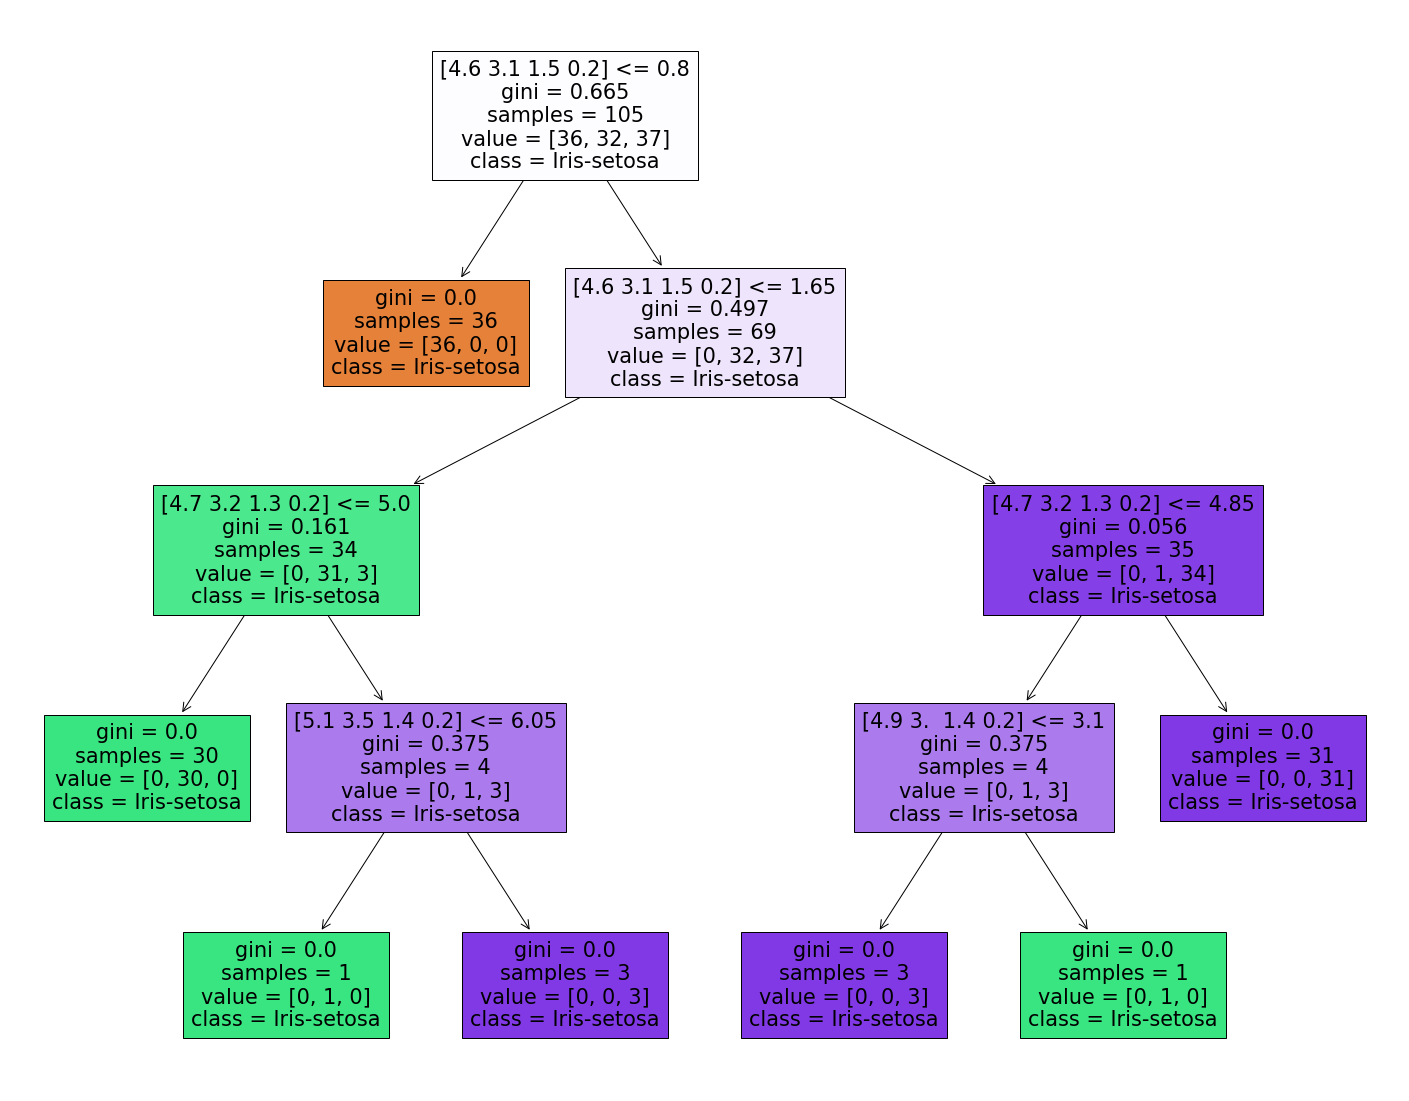

In [24]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(dectree,feature_names=features,
                class_names=classes,
                filled=True)

In [25]:
text_representation=tree.export_text(dectree)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica

